In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os

### Preskalovani pro VMD

In [13]:
def preskalovat_soubor(cislo_pokusu, nazev_slozky):
    nazev_souboru = f"{nazev_slozky}\\polohy_MC_{cislo_pokusu}.xyz"

    with open(nazev_souboru, "r") as soubor:
        radky = soubor.readlines()

    with open(f"{nazev_slozky}\\preskalovany_soubor_{cislo_pokusu}.xyz", "w") as soubor:
        soubor.write(radky[0])
        soubor.write(radky[1])
        for line in radky[2:]:
            castice = line.split()
            if len(castice) == 4 and castice[0] == "Ar": 
                x, y, z = float(castice[1]) * 1e9, float(castice[2]) * 1e9, float(castice[3]) * 1e9
                soubor.write(f"Ar {x:.3f} {y:.3f} {z:.3f}\n")
            elif len(castice) > 0:
                soubor.write(radky[0])
                soubor.write(radky[1])


### Zobrazeni e_pot

In [14]:
def zobrazit_pot_en(cislo_pokusu, nazev_slozky):
    soubor_energie_MC = f"{nazev_slozky}\\prubeh_en_MC_{cislo_pokusu}.txt"
    en_pot = []

    with open(soubor_energie_MC, "r") as soubor:
        for radek in soubor:
            _, e = radek.split()
            en_pot.append(float(e))

    a = np.array(en_pot)
    plt.plot(a)
    plt.show()

Volba zmenit cislo pokusu

In [ ]:
cislo_pokusu = "n"
nazev_slozky = f"Pokus_cislo_{cislo_pokusu}"

# preskalovat_soubor(cislo_pokusu, nazev_slozky)
# zobrazit_pot_en(cislo_pokusu, nazev_slozky)

In [10]:
def en_skalovat(cislo_pokusu, nazev_slozky):
    soubor_energie_MC = f"{nazev_slozky}\\prubeh_en_MC_{cislo_pokusu}.txt"
    en_pot = []

    with open(soubor_energie_MC, "r") as soubor:
        for radek in soubor:
            _, e = radek.split()
            en_pot.append(float(e))

    a = np.array(en_pot)
    return a

In [11]:
cislo_pokusu = "5"
nazev_slozky = f"Pokus_cislo_{cislo_pokusu}"
a = en_skalovat(cislo_pokusu, nazev_slozky )
pocet_castic = 500
avog_konst =6.022E23
a = a / pocet_castic * avog_konst


In [12]:
a

array([-19.10562718, -19.08683615, -18.66468987, ..., -32.16589198,
       -32.16589198, -32.16354585])

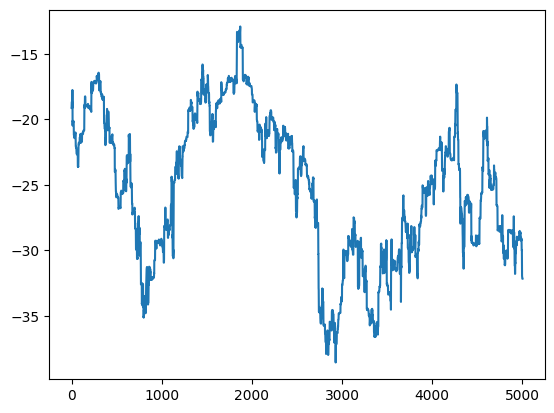

In [13]:
plt.plot(a)